# DAGUSIA

In [2]:
import random
import numpy as np
TRIALS = 1
saturation = 0.3
n = [10, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800, 900, 1000]

def DAGgenerate(n_ver, trial): 
    n_edg = int (saturation * 0.5 * n_ver * (n_ver - 1))
    if (n_edg < n_ver-1):
        n_edg = n_ver-1
    
    #print("EDGES:"+str(n_edg))
    
    #tutaj na skosie daje 2 żeby się nie myliło, poprzednio było 1 ale to tylko do pętli (*)
    edges = np.zeros((n_ver, n_ver))
    for x in range(n_ver):
        edges[x][x]=2

    f = open("DAGdata/DAG"+str(n_ver)+"_"+str(trial)+".txt", 'w')

    for i in range (1,n_edg+1):
        if (i < n_ver ):
            a = i
            b = random.randint(0,i-1)
        else:
            a = random.randint(0,n_ver-1)
            b = random.randint(0,n_ver-1)
            
        while (a==b or edges[a][b]>0): # (*) wcześniej było ==0
            a = random.randint(0,n_ver-1)
            b = random.randint(0,n_ver-1)
        
        if(a==b):
            print("!!!!!")
        
        if (a < b): # (x, y) x < y 
            f.write(str(a) + " " + str(b) + "\n")
            edges[a][b]=1
        else:
            f.write(str(b) + " " + str(a) + "\n")
            edges[b][a]=1
    f.close()
    
    #print(edges)

for ver in n:
    for trial in range (TRIALS):
        DAGgenerate (ver, trial)
        #print ("DONE ", ver, trial)

# CHART MAKER

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import random
saturation = 0.3
n = [10, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800, 900, 1000]
TRIALS = 10

In [39]:
def read_data (filename):
    data = []
    f = open(filename+".txt")
    for no in n:
        temp = f.readline()
        temp = float(temp[temp.find(" ")+1:temp.find("\n")])
        #print(temp)
        data.append(temp)
    f.close()
    return data;

In [43]:
DATA = []

for i in range (TRIALS):
    DATA.append(read_data("DFSresults_{}".format(i)))

RESULTS = np.mean(DATA, axis=0)
RESULTS = RESULTS/100/1000

#print(DATA)
print(RESULTS)   

[1.000e-06 3.400e-05 3.400e-05 7.700e-05 1.160e-04 1.720e-04 2.210e-04
 3.440e-04 5.400e-04 8.160e-04 1.078e-03 1.484e-03 1.897e-03 2.453e-03]


In [44]:
f = open("FINAL.txt", 'w')

for i in range(len(n)):
    f.write(str(n[i])+"\t")
    f.write(str(round(RESULTS[i], 4))+"\t")
    f.write("\n")
f.close()

<function matplotlib.pyplot.show(close=None, block=None)>

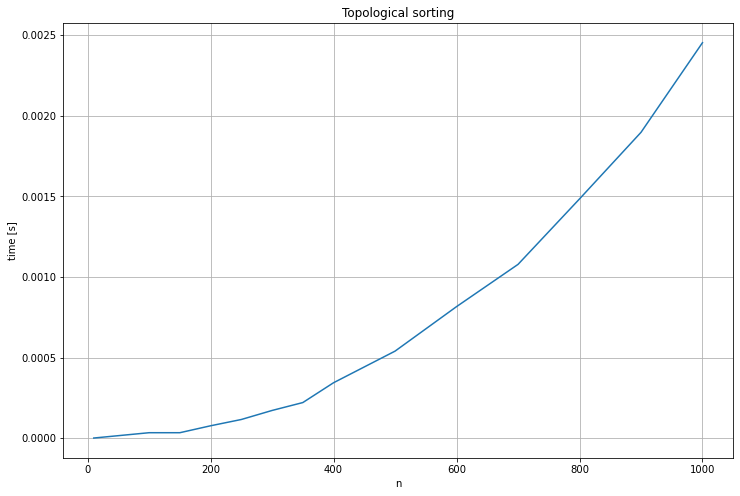

In [46]:
fig, ax = plt.subplots(figsize = (12,8))
#ax.plot(n, RESULTS, label = "saturation = 30%") 
ax.plot(n, RESULTS)  

ax.set_xlabel("n")
ax.set_ylabel("time [s]")
#plt.legend(loc='upper left')
plt.grid(True)
ax.set_title("Topological sorting")
plt.show
#plt.savefig("chart.svg")